### Preparacion del entorno y el dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product 
from prophet import Prophet

c:\Users\marco\anaconda3\envs\ldi2_cuda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cargamos el dataset

In [3]:
df = pd.read_csv('Geochemical_Checklist.csv', sep=',') # leemos el archivo csv
pd.set_option('display.max_columns', None) # lo que realizamos aquí es que se muestren todas las columnas
#print(df.head(5)) # mostramos las primeras 5 filas

Breve resumen del dataset

In [4]:
#mostramos las columnas que tenemos y su tipo de dato
print(df.dtypes)

Project                     object
Despach N° RA-20XX-XXXX     object
SampleID_Init               object
SampleID_Fin                object
TotalSample_SE               int64
Weight SE                  float64
SampleType                  object
Target                      object
Laboratory                  object
Prepared Method             object
Analytical Method           object
DispatchDate                object
Over Limit                  object
Analytes                    object
ReceivedDate                object
ResultDate                  object
Workorder                   object
Location                    object
Responsible                 object
dtype: object


In [5]:
#transformamos las fechas a tipo datetime (dispatchDate, ReceivedDate,Resultdate) mes,dia,año
df['DispatchDate'] = pd.to_datetime(df['DispatchDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ResultDate'] = pd.to_datetime(df['ResultDate'])

### Modelo Prophet sin Regresores (solo : 'ds','y')

#### Dispatchdate

              TotalSample_SE
DispatchDate                
2021-11-22               144
2021-11-30                81
2021-12-17                84
2022-01-13                26
2022-01-24                99


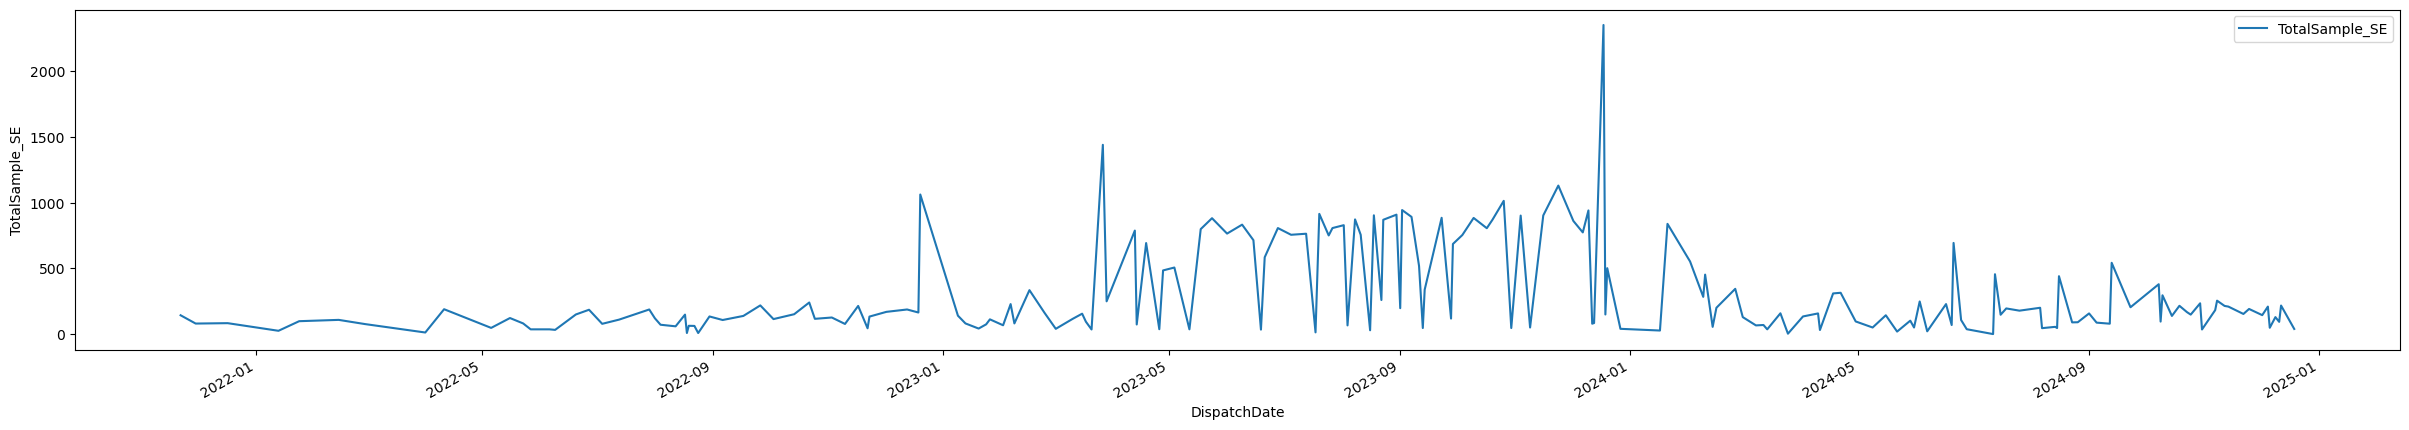

In [6]:
# Agrupamos la sumatoria de TotalSample_SE en las mismas fechas
#convertimos en categoricas
#convertimos algunos features en categoricas.
df_dispatchdate = df[[ 'TotalSample_SE','DispatchDate']]
df_dispatchdate_agrupado = df_dispatchdate.groupby('DispatchDate').sum()
print(df_dispatchdate_agrupado.head(5))

# Graficamos
df_dispatchdate_agrupado.plot(figsize=(30, 5))
plt.xlabel('DispatchDate')
plt.ylabel('TotalSample_SE')
plt.show()

In [7]:
#Convertimos el dataframe a un formato que pueda ser leido por Prophet
df_dispatchdate= df_dispatchdate.rename(columns = {'DispatchDate':'ds', 'TotalSample_SE':'y',})
# Agregamos la suma de 'y' por 'ds'
df_dispatchdate = df_dispatchdate.groupby('ds')['y'].sum().reset_index()

 Modelo de prediccion 

14:52:54 - cmdstanpy - INFO - Chain [1] start processing
14:52:54 - cmdstanpy - INFO - Chain [1] done processing


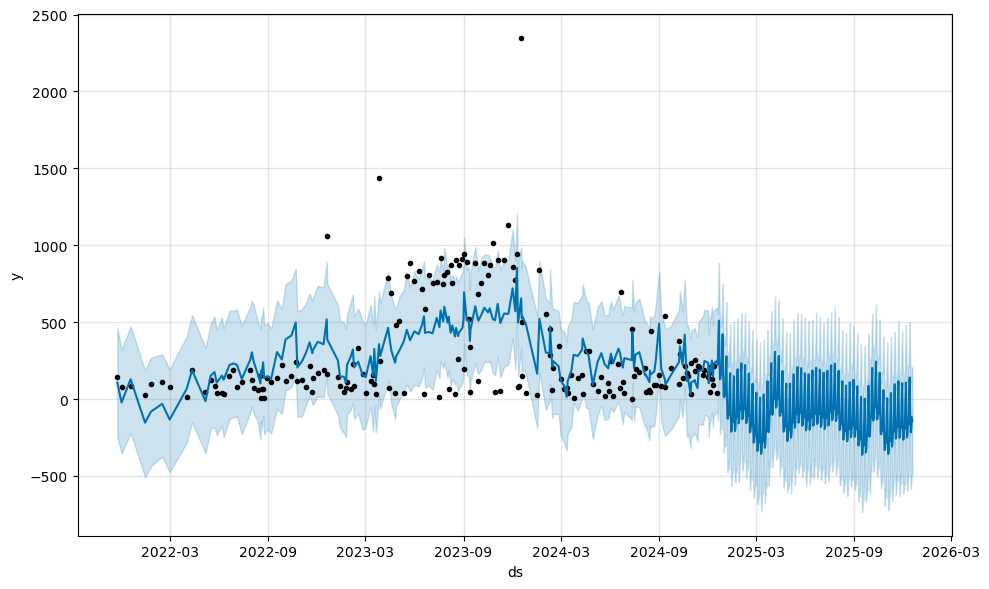

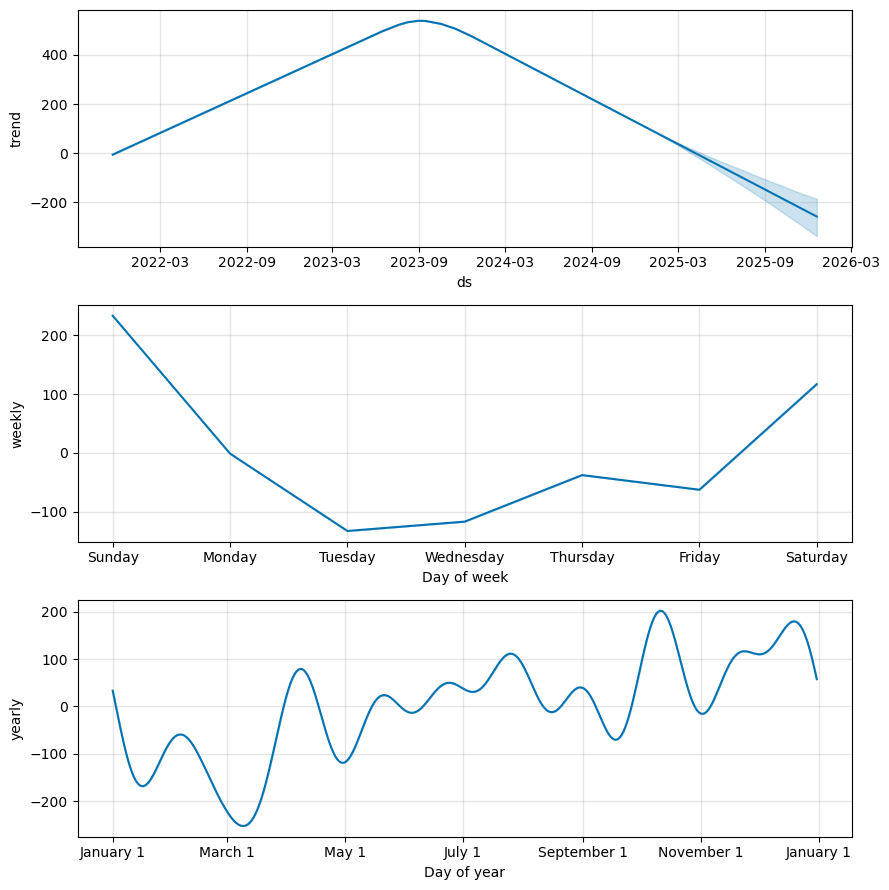

In [8]:
#creamos el modelo de predicción
model = Prophet()
model.fit(df_dispatchdate)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
model.plot(forecast)
plt.show()
model.plot_components(forecast)
plt.show()

In [9]:
# Calculamos las métricas de evaluación
y_true = df_dispatchdate['y']  # Valores reales
y_pred = forecast['yhat'][:len(df_dispatchdate)]  # Predicciones para el período histórico

mse_Modelo1 = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae_Modelo1 = mean_absolute_error(y_true, y_pred)

# Mostramos las métricas
print(f"MSE: {mse_Modelo1}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae_Modelo1}")

MSE: 73772.17270317863
RMSE: 271.6103324676339
MAE: 196.1165100859429


c:\Users\marco\anaconda3\envs\ldi2_cuda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### ReceivedDate

              TotalSample_SE
DispatchDate                
2021-11-22               144
2021-11-30                81
2021-12-17                84
2022-01-13                26
2022-01-24                99


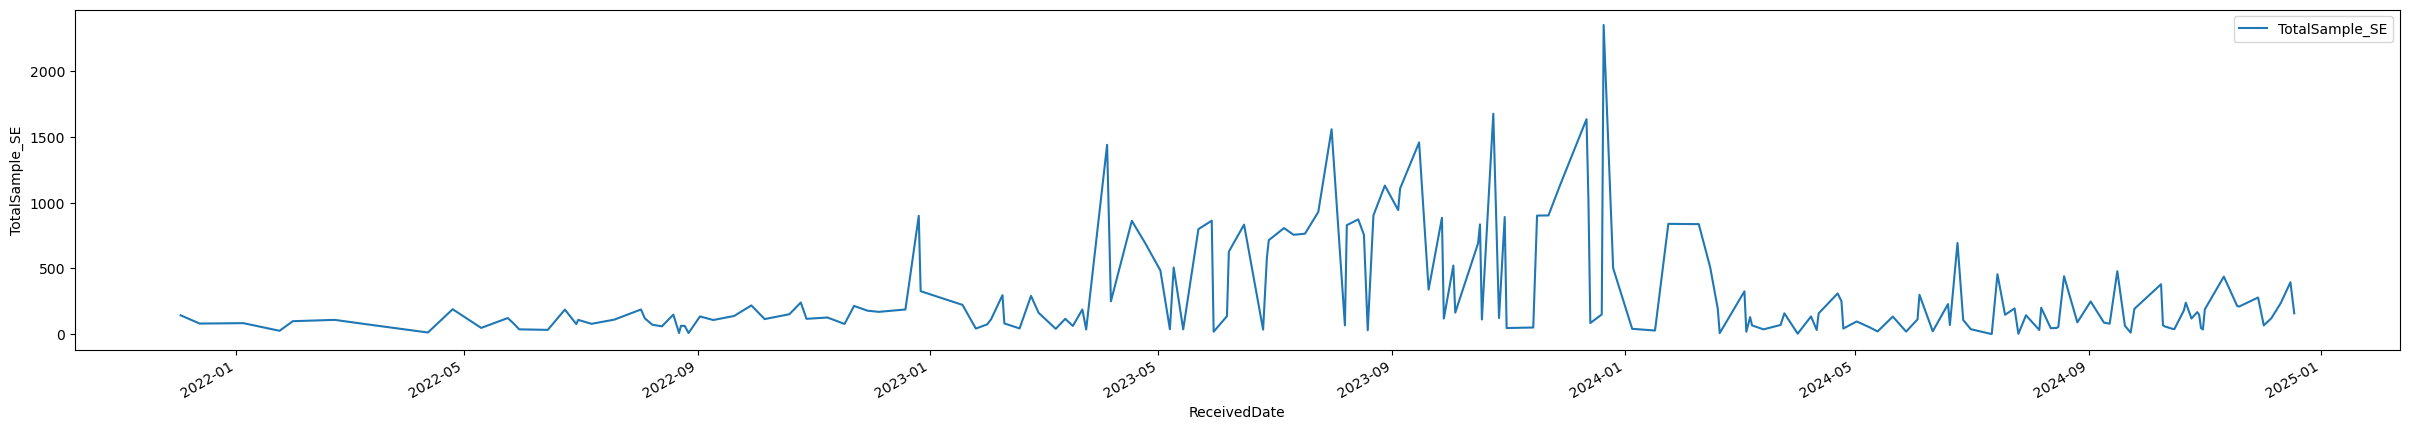

In [10]:
# Agrupamos la sumatoria de TotalSample_SE en las mismas fechas
#convertimos en categoricas
#convertimos algunos features en categoricas.
df_receiveddate = df[[ 'TotalSample_SE','ReceivedDate']]
df_receiveddate_agrupado = df_receiveddate.groupby('ReceivedDate').sum()
print(df_dispatchdate_agrupado.head(5))

# Graficamos
df_receiveddate_agrupado.plot(figsize=(30, 5))
plt.xlabel('ReceivedDate')
plt.ylabel('TotalSample_SE')
plt.show()

In [11]:
#Convertimos el dataframe a un formato que pueda ser leido por Prophet
df_receiveddate= df_receiveddate.rename(columns = {'ReceivedDate':'ds', 'TotalSample_SE':'y',})
# Agregamos la suma de 'y' por 'ds'
df_receiveddate = df_receiveddate.groupby('ds')['y'].sum().reset_index()

14:52:55 - cmdstanpy - INFO - Chain [1] start processing
14:52:55 - cmdstanpy - INFO - Chain [1] done processing


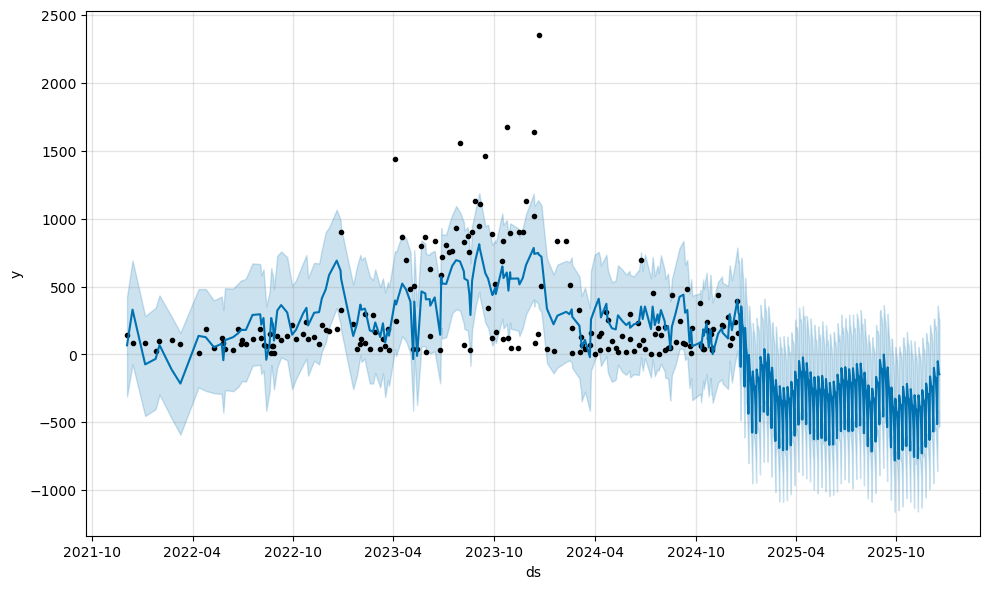

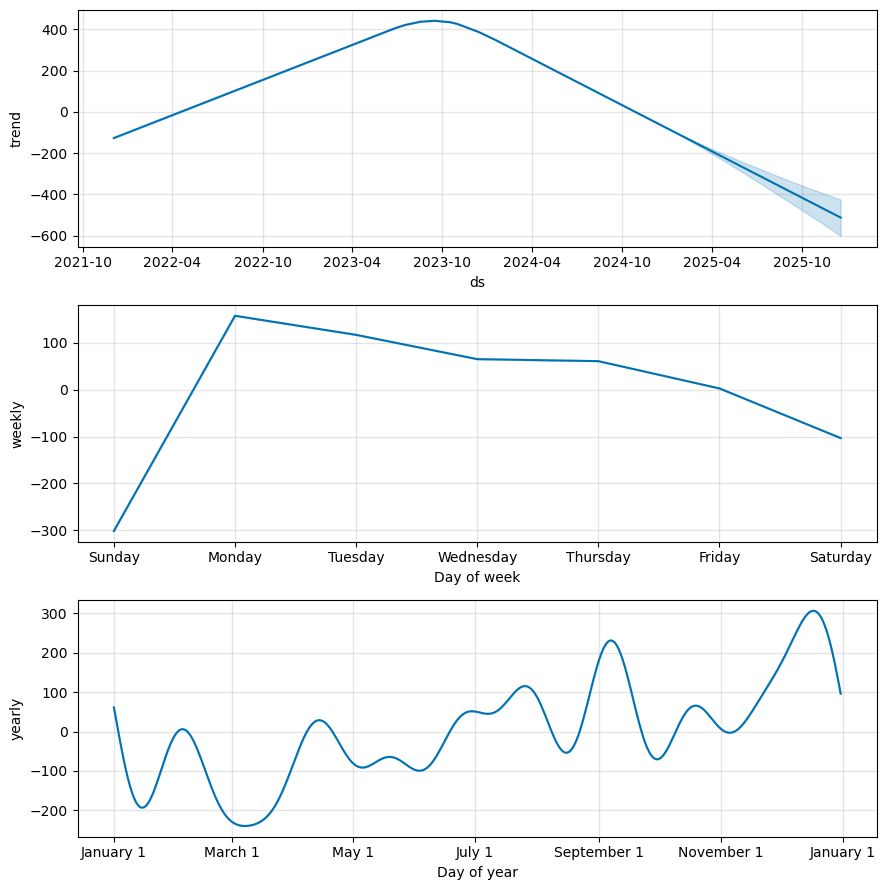

In [12]:
#creamos el modelo de predicción
model = Prophet()
model.fit(df_receiveddate)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
model.plot(forecast)
plt.show()
model.plot_components(forecast)
plt.show()

In [13]:
# Calculamos las métricas de evaluación
y_true = df_receiveddate['y']  # Valores reales
y_pred = forecast['yhat'][:len(df_receiveddate)]  # Predicciones para el período histórico

mse_Modelo1 = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae_Modelo1 = mean_absolute_error(y_true, y_pred)

# Mostramos las métricas
print(f"MSE: {mse_Modelo1}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae_Modelo1}")

MSE: 88414.36205337086
RMSE: 297.3455263718808
MAE: 212.54454867788104


c:\Users\marco\anaconda3\envs\ldi2_cuda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### ResultDate

            TotalSample_SE
ResultDate                
2022-01-20             144
2022-02-07              81
2022-02-19              84
2022-02-28               6
2022-03-01              11


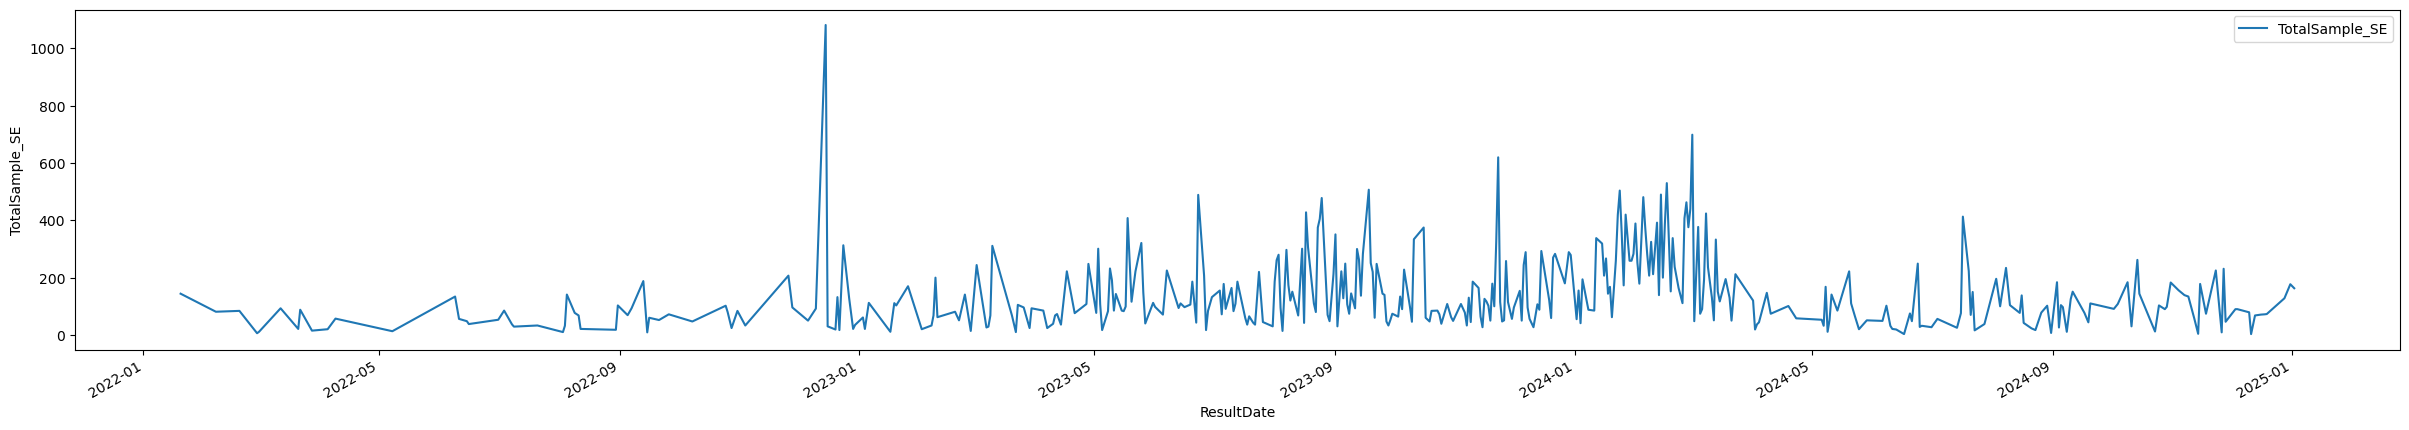

In [14]:
# Agrupamos la sumatoria de TotalSample_SE en las mismas fechas
#convertimos en categoricas
#convertimos algunos features en categoricas.
df_resultdate = df[[ 'TotalSample_SE','ResultDate']]
df_resultdate_agrupado = df_resultdate.groupby('ResultDate').sum()
print(df_resultdate_agrupado.head(5))

# Graficamos
df_resultdate_agrupado.plot(figsize=(30, 5))
plt.xlabel('ResultDate')
plt.ylabel('TotalSample_SE')
plt.show()

In [15]:
#Convertimos el dataframe a un formato que pueda ser leido por Prophet
df_resultdate= df_resultdate.rename(columns = {'ResultDate':'ds', 'TotalSample_SE':'y',})
# Agregamos la suma de 'y' por 'ds'
df_resultdate = df_resultdate.groupby('ds')['y'].sum().reset_index()

14:52:55 - cmdstanpy - INFO - Chain [1] start processing
14:52:55 - cmdstanpy - INFO - Chain [1] done processing


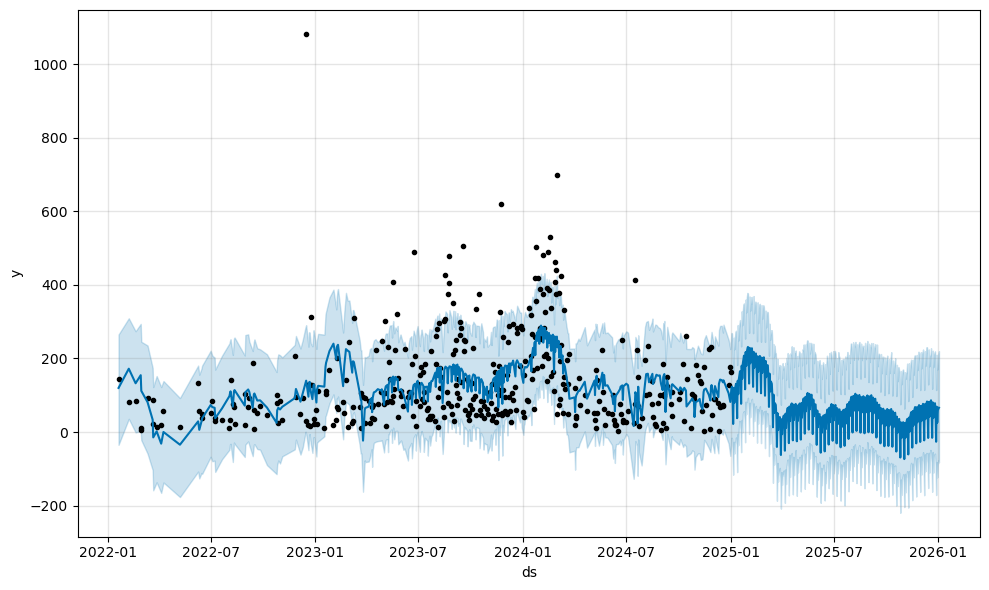

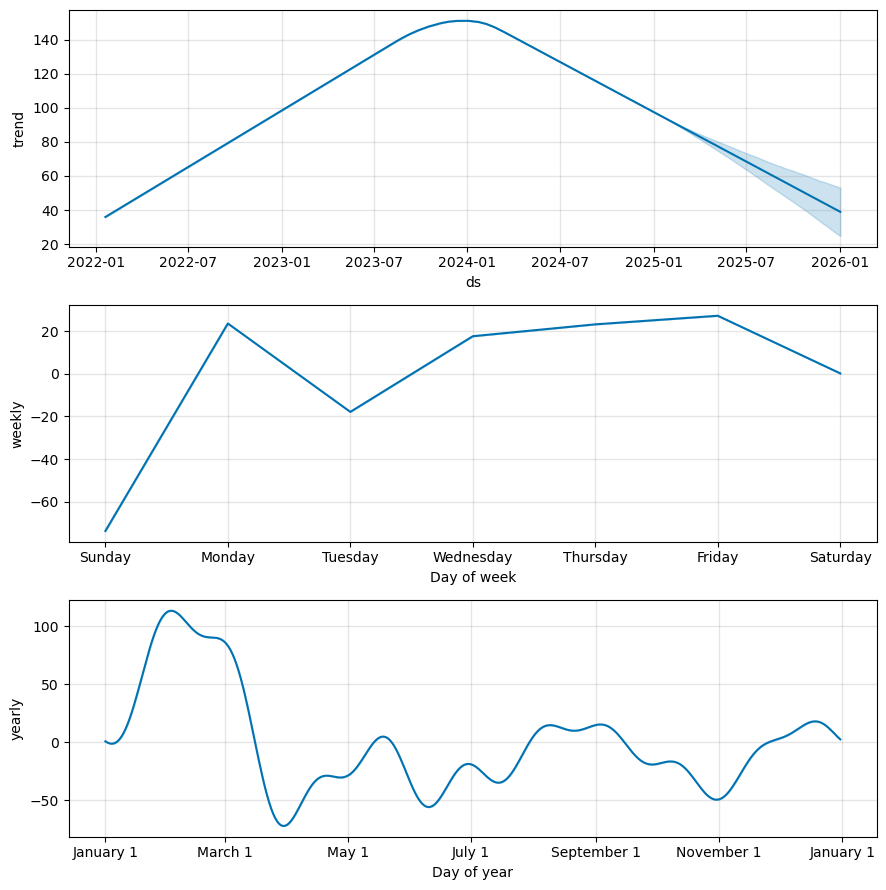

In [16]:
#creamos el modelo de predicción
model = Prophet()
model.fit(df_resultdate)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
model.plot(forecast)
plt.show()
model.plot_components(forecast)
plt.show()

In [17]:
# Calculamos las métricas de evaluación
y_true = df_resultdate['y']  # Valores reales
y_pred = forecast['yhat'][:len(df_resultdate)]  # Predicciones para el período histórico

mse_Modelo1 = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae_Modelo1 = mean_absolute_error(y_true, y_pred)

# Mostramos las métricas
print(f"MSE: {mse_Modelo1}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae_Modelo1}")

MSE: 12298.332484384622
RMSE: 110.89784706830255
MAE: 79.51642863146681


c:\Users\marco\anaconda3\envs\ldi2_cuda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



### Modelo Prophet con Regresores

#### DispatchDate

In [18]:
df = pd.read_csv('Geochemical_Checklist.csv', sep=',') # leemos el archivo csv
pd.set_option('display.max_columns', None) # lo que realizamos aquí es que se muestren todas las columnas
#print(df.head(5)) # mostramos las primeras 5 filas
#transformamos las fechas a tipo datetime (dispatchDate, ReceivedDate,Resultdate) mes,dia,año
df['DispatchDate'] = pd.to_datetime(df['DispatchDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ResultDate'] = pd.to_datetime(df['ResultDate'])
#convertimos en categoricas
#convertimos algunos features en categoricas.
df['SampleType'] = df['SampleType'].astype('category')
df['Target'] = df['Target'].astype('category')
df_dispatchdate = df[['TotalSample_SE', 'DispatchDate','Despach N° RA-20XX-XXXX','SampleType','Analytical Method','Project']]

In [19]:
df_dispatchdate= df_dispatchdate.rename(columns = {'DispatchDate':'ds', 'TotalSample_SE':'y','Despach N° RA-20XX-XXXX':'despatch_n'})
df_dispatchdate.head()
# Tabla con la suma de 'y'
df_suma = df_dispatchdate.groupby('ds')['y'].sum().reset_index()
# Tabla con las columnas categóricas (tomamos el primer valor de cada categoría por fecha)
df_categorias = df_dispatchdate.groupby('ds')[['SampleType','Project' , 'Analytical Method']].first().reset_index() #reset index sirve para resetear el index es decir que el index sea el numero de la fila 
# Unimos las dos tablas
df_dispatchdate_agrupado = pd.merge(df_suma, df_categorias, on='ds')
df_dispatchdate_agrupado.head(70)

,ds,y,SampleType,Project,Analytical Method
0,2021-11-22,144,StreamSed,BRAU,ME-MS61L+Au-ICP22
1,2021-11-30,81,StreamSed,BRAU,ME-MS61L+Au-ICP22
2,2021-12-17,84,StreamSed,BRAU,ME-MS61L+Au-ICP22
3,2022-01-13,26,RockChip,BRAR,ME-MS61L+ME-MS81+Au-ICP22
4,2022-01-24,99,RockChip,BRAR,ME-MS61L+ME-MS81+Au-ICP22
...,...,...,...,...,...
65,2023-04-26,38,RockChip,BRNE,ME-MS61L+ME-MS81
66,2023-04-28,485,RC,BRAR,ICP95A / IMS95A
67,2023-05-04,507,RockChip,BRAL,ME-MS61L+ME-MS81
68,2023-05-12,37,StreamSed,BRBA,ME-MS61L+Au-ICP22


In [20]:
df_dummies= pd.get_dummies(df_dispatchdate_agrupado, columns=['SampleType','Project','Analytical Method']) #creamos las variables dummies, columns signi
#exportamos el dataset en un csv
df_dummies.to_csv('df_dummies2.csv', index=False)
#separamos en train y future. Para future tomamos los ultimos 6 meses
future = df_dummies[df_dummies['ds'] >= '2024-06-01']
train = df_dummies[df_dummies['ds'] < '2024-06-01']

In [21]:
model = Prophet()
# Regresores
regresores = [col for col in df_dummies.columns if col not in ['ds', 'y']]
print(regresores)

['SampleType_Auger', 'SampleType_Channel', 'SampleType_DDH', 'SampleType_New Extraction Test', 'SampleType_Pulp', 'SampleType_RC', 'SampleType_RockChip', 'SampleType_RockChipP', 'SampleType_Soil', 'SampleType_StreamSed', 'Project_BRAL', 'Project_BRAR', 'Project_BRAU', 'Project_BRBA', 'Project_BRGO', 'Project_BRJA', 'Project_BRMG', 'Project_BRNE', 'Analytical Method_Au-ICP22', 'Analytical Method_ICP95A / IMS95A', 'Analytical Method_IMS95RS', 'Analytical Method_ME-MS61L+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS61L-REE', 'Analytical Method_ME-MS61L+ME-MS61L-REE+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS81', 'Analytical Method_ME-MS61L+ME-MS81+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS81+PGM-ICP24', 'Analytical Method_ME-MS61L+ME-MS81+PGM-ICP27', 'Analytical Method_ME-MS61L+PGM-ICP24', 'Analytical Method_ME-MS89L', 'Analytical Method_PULPRP_G2+ICP95A/IMS95A', 'Analytical Method_TRSPEC-20']


In [22]:
# Agregamos los regresores al modelo
for reg in regresores:
    model.add_regressor(reg)

# Ajustamos el modelo
model.fit(df_dummies)  # Asegúrate de que 'df' contenga las columnas 'ds', 'y' y los regresores
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:52:56 - cmdstanpy - INFO - Chain [1] start processing
14:52:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
42,2024-12-06,82.515290,-158.632898,334.094606
43,2024-12-09,276.451625,17.597797,525.707215
44,2024-12-11,223.653155,-30.825705,497.144409
45,2024-12-12,264.762867,11.237129,512.523171
46,2024-12-19,371.846837,119.264853,610.616208


In [23]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae_Modelo2 = mean_absolute_error(y_true, y_pred)
    mse_Modelo2 = mean_squared_error(y_true, y_pred)
    return mae_Modelo2, mse_Modelo2,

y_true = future['y']  # Valores reales de la serie original
y_pred = forecast['yhat']  # Predicciones de la serie forecast ('yhat' es la predicción puntual)

mae_Modelo2, mse_Modelo2 = evaluate_forecast(y_true, y_pred)

# Mostrar resultados
print(f"Métricas de pronóstico versus futuro:")
print(f"MAE: {mae_Modelo2}")
print(f"MSE: {mse_Modelo2}")

Métricas de pronóstico versus futuro:
MAE: 102.57324863006232
MSE: 17524.809641032796


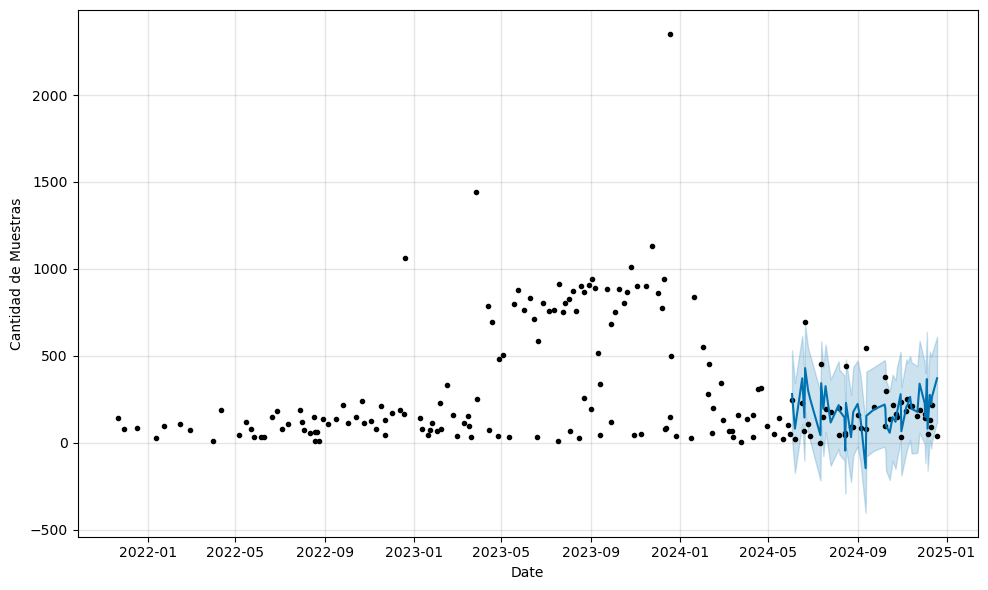

In [24]:
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Cantidad de Muestras')
plt.show()

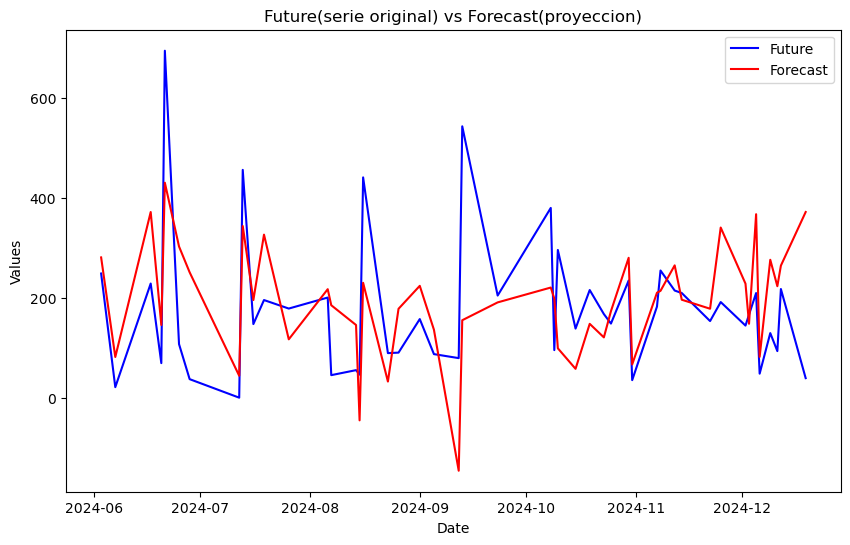

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(future['ds'], future['y'], label='Future', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Future(serie original) vs Forecast(proyeccion)')
plt.legend()
# gráfico
plt.show()

In [26]:
#ahora realizamos una prediccion hacia el futuro de los proximos 6 meses
future = model.make_future_dataframe(periods=180)
future.to_csv('future2.csv', index=False)

#### ReceivedDate

In [27]:
df = pd.read_csv('Geochemical_Checklist.csv', sep=',') # leemos el archivo csv
pd.set_option('display.max_columns', None) # lo que realizamos aquí es que se muestren todas las columnas
#print(df.head(5)) # mostramos las primeras 5 filas
#transformamos las fechas a tipo datetime (dispatchDate, ReceivedDate,Resultdate) mes,dia,año
df['DispatchDate'] = pd.to_datetime(df['DispatchDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ResultDate'] = pd.to_datetime(df['ResultDate'])
#convertimos en categoricas
#convertimos algunos features en categoricas.
df['SampleType'] = df['SampleType'].astype('category')
df['Target'] = df['Target'].astype('category')
df_receiveddate = df[['TotalSample_SE', 'DispatchDate','Despach N° RA-20XX-XXXX','SampleType','Analytical Method','Project']]

In [28]:
df_dispatchdate= df_dispatchdate.rename(columns = {'DispatchDate':'ds', 'TotalSample_SE':'y','Despach N° RA-20XX-XXXX':'despatch_n'})
df_dispatchdate.head()
# Tabla con la suma de 'y'
df_suma = df_dispatchdate.groupby('ds')['y'].sum().reset_index()
# Tabla con las columnas categóricas (tomamos el primer valor de cada categoría por fecha)
df_categorias = df_dispatchdate.groupby('ds')[['SampleType','Project' , 'Analytical Method']].first().reset_index() #reset index sirve para resetear el index es decir que el index sea el numero de la fila 
# Unimos las dos tablas
df_dispatchdate_agrupado = pd.merge(df_suma, df_categorias, on='ds')
df_dispatchdate_agrupado.head(70)

,ds,y,SampleType,Project,Analytical Method
0,2021-11-22,144,StreamSed,BRAU,ME-MS61L+Au-ICP22
1,2021-11-30,81,StreamSed,BRAU,ME-MS61L+Au-ICP22
2,2021-12-17,84,StreamSed,BRAU,ME-MS61L+Au-ICP22
3,2022-01-13,26,RockChip,BRAR,ME-MS61L+ME-MS81+Au-ICP22
4,2022-01-24,99,RockChip,BRAR,ME-MS61L+ME-MS81+Au-ICP22
...,...,...,...,...,...
65,2023-04-26,38,RockChip,BRNE,ME-MS61L+ME-MS81
66,2023-04-28,485,RC,BRAR,ICP95A / IMS95A
67,2023-05-04,507,RockChip,BRAL,ME-MS61L+ME-MS81
68,2023-05-12,37,StreamSed,BRBA,ME-MS61L+Au-ICP22


In [29]:
df_dummies= pd.get_dummies(df_dispatchdate_agrupado, columns=['SampleType','Project','Analytical Method']) #creamos las variables dummies, columns signi
#exportamos el dataset en un csv
df_dummies.to_csv('df_dummies2.csv', index=False)
#separamos en train y future. Para future tomamos los ultimos 6 meses
future = df_dummies[df_dummies['ds'] >= '2024-06-01']
train = df_dummies[df_dummies['ds'] < '2024-06-01']

In [30]:
model = Prophet()
# Regresores
regresores = [col for col in df_dummies.columns if col not in ['ds', 'y']]
print(regresores)

['SampleType_Auger', 'SampleType_Channel', 'SampleType_DDH', 'SampleType_New Extraction Test', 'SampleType_Pulp', 'SampleType_RC', 'SampleType_RockChip', 'SampleType_RockChipP', 'SampleType_Soil', 'SampleType_StreamSed', 'Project_BRAL', 'Project_BRAR', 'Project_BRAU', 'Project_BRBA', 'Project_BRGO', 'Project_BRJA', 'Project_BRMG', 'Project_BRNE', 'Analytical Method_Au-ICP22', 'Analytical Method_ICP95A / IMS95A', 'Analytical Method_IMS95RS', 'Analytical Method_ME-MS61L+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS61L-REE', 'Analytical Method_ME-MS61L+ME-MS61L-REE+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS81', 'Analytical Method_ME-MS61L+ME-MS81+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS81+PGM-ICP24', 'Analytical Method_ME-MS61L+ME-MS81+PGM-ICP27', 'Analytical Method_ME-MS61L+PGM-ICP24', 'Analytical Method_ME-MS89L', 'Analytical Method_PULPRP_G2+ICP95A/IMS95A', 'Analytical Method_TRSPEC-20']


In [31]:
# Agregamos los regresores al modelo
for reg in regresores:
    model.add_regressor(reg)

# Ajustamos el modelo
model.fit(df_dummies)  # Asegúrate de que 'df' contenga las columnas 'ds', 'y' y los regresores
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:52:56 - cmdstanpy - INFO - Chain [1] start processing
14:52:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
42,2024-12-06,82.515290,-149.895654,336.329378
43,2024-12-09,276.451625,23.965385,541.898979
44,2024-12-11,223.653155,-44.034246,477.615008
45,2024-12-12,264.762867,20.755195,526.177055
46,2024-12-19,371.846837,133.835418,626.361597


In [32]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae_Modelo2 = mean_absolute_error(y_true, y_pred)
    mse_Modelo2 = mean_squared_error(y_true, y_pred)
    return mae_Modelo2, mse_Modelo2,

y_true = future['y']  # Valores reales de la serie original
y_pred = forecast['yhat']  # Predicciones de la serie forecast ('yhat' es la predicción puntual)

mae_Modelo2, mse_Modelo2 = evaluate_forecast(y_true, y_pred)

# Mostrar resultados
print(f"Métricas de pronóstico versus futuro:")
print(f"MAE: {mae_Modelo2}")
print(f"MSE: {mse_Modelo2}")

Métricas de pronóstico versus futuro:
MAE: 102.57324863006232
MSE: 17524.809641032796


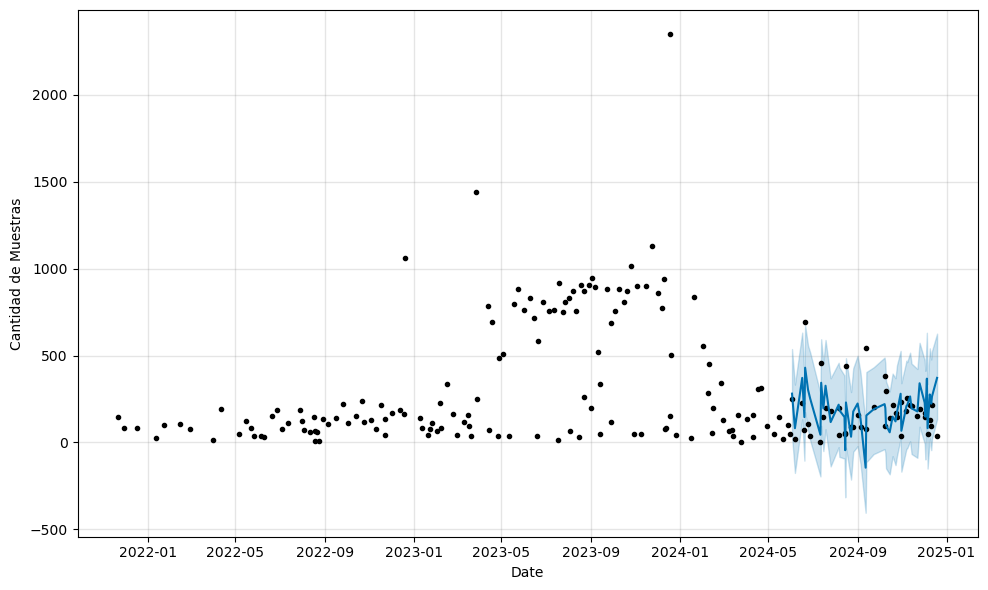

In [33]:
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Cantidad de Muestras')
plt.show()

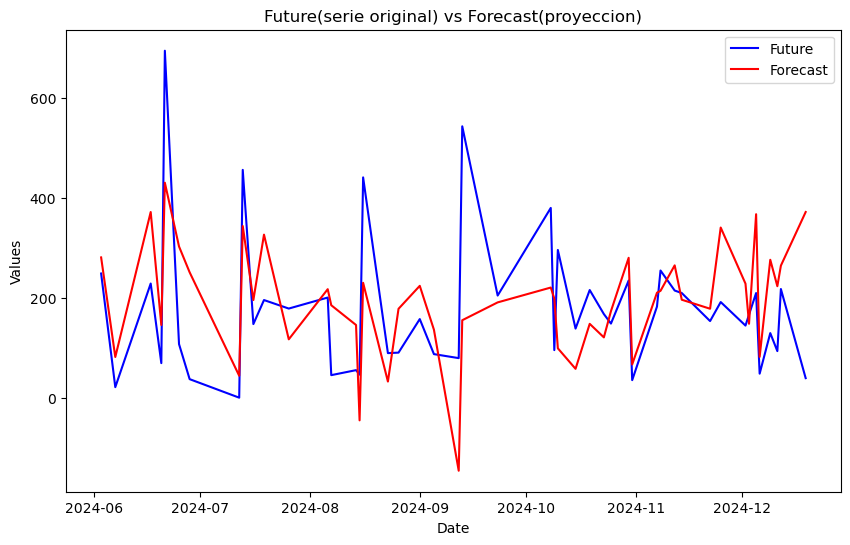

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(future['ds'], future['y'], label='Future', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Future(serie original) vs Forecast(proyeccion)')
plt.legend()
# gráfico
plt.show()

In [35]:
#ahora realizamos una prediccion hacia el futuro de los proximos 6 meses
future = model.make_future_dataframe(periods=180)
future.to_csv('future2.csv', index=False)

#### ResultDate

In [46]:
df = pd.read_csv('Geochemical_Checklist.csv', sep=',') # leemos el archivo csv
pd.set_option('display.max_columns', None) # lo que realizamos aquí es que se muestren todas las columnas
#print(df.head(5)) # mostramos las primeras 5 filas
#transformamos las fechas a tipo datetime (dispatchDate, ReceivedDate,Resultdate) mes,dia,año
df['DispatchDate'] = pd.to_datetime(df['DispatchDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ResultDate'] = pd.to_datetime(df['ResultDate'])
#convertimos en categoricas
#convertimos algunos features en categoricas.
df['SampleType'] = df['SampleType'].astype('category')
df['Target'] = df['Target'].astype('category')
df_resultdate = df[['TotalSample_SE', 'ResultDate','Despach N° RA-20XX-XXXX','SampleType','Analytical Method','Project']]

In [49]:
df_resultdate= df_resultdate.rename(columns = {'ResultDate':'ds', 'TotalSample_SE':'y','Despach N° RA-20XX-XXXX':'despatch_n'})
df_resultdate.head()
# Tabla con la suma de 'y'
df_suma = df_resultdate.groupby('ds')['y'].sum().reset_index()
# Tabla con las columnas categóricas (tomamos el primer valor de cada categoría por fecha)
df_categorias = df_resultdate.groupby('ds')[['SampleType','Project' , 'Analytical Method']].first().reset_index() #reset index sirve para resetear el index es decir que el index sea el numero de la fila 
# Unimos las dos tablas
df_resultdate_agrupado = pd.merge(df_suma, df_categorias, on='ds')
df_resultdate_agrupado.head(70)

,ds,y,SampleType,Project,Analytical Method
0,2022-01-20,144,StreamSed,BRAU,ME-MS61L+Au-ICP22
1,2022-02-07,81,StreamSed,BRAU,ME-MS61L+Au-ICP22
2,2022-02-19,84,StreamSed,BRAU,ME-MS61L+Au-ICP22
3,2022-02-28,6,RockChip,BRAR,ME-MS61L+ME-MS81+Au-ICP22
4,2022-03-01,11,RockChip,BRAR,ME-MS61L+ME-MS81+Au-ICP22
...,...,...,...,...,...
65,2023-02-09,200,Auger,BRAR,ME-MS61L+ME-MS81
66,2023-02-10,62,Auger,BRAL,ME-MS61L+ME-MS81
67,2023-02-19,81,StreamSed,BRAL,ME-MS61L+ME-MS81+Au-ICP22
68,2023-02-21,51,RockChip,BRAL,ME-MS61L+ME-MS81


In [50]:
df_dummies= pd.get_dummies(df_resultdate_agrupado, columns=['SampleType','Project','Analytical Method']) #creamos las variables dummies, columns signi
#exportamos el dataset en un csv
df_dummies.to_csv('df_dummies2.csv', index=False)
#separamos en train y future. Para future tomamos los ultimos 6 meses
future = df_dummies[df_dummies['ds'] >= '2024-06-01']
train = df_dummies[df_dummies['ds'] < '2024-06-01']

In [51]:
model = Prophet()
# Regresores
regresores = [col for col in df_dummies.columns if col not in ['ds', 'y']]
print(regresores)

['SampleType_Auger', 'SampleType_Channel', 'SampleType_DDH', 'SampleType_New Extraction Test', 'SampleType_Pulp', 'SampleType_RC', 'SampleType_RockChip', 'SampleType_RockChipP', 'SampleType_Soil', 'SampleType_StreamSed', 'Project_BRAL', 'Project_BRAR', 'Project_BRAU', 'Project_BRBA', 'Project_BRGO', 'Project_BRJA', 'Project_BRMG', 'Project_BRNE', 'Analytical Method_Au-AA24', 'Analytical Method_Au-ICP22', 'Analytical Method_ICP95A / IMS95A', 'Analytical Method_ME-MS61L+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS61L-REE', 'Analytical Method_ME-MS61L+ME-MS61L-REE+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS81', 'Analytical Method_ME-MS61L+ME-MS81+Au-ICP22', 'Analytical Method_ME-MS61L+ME-MS81+PGM-ICP24', 'Analytical Method_ME-MS61L+ME-MS81+PGM-ICP27', 'Analytical Method_ME-MS61L+PGM-ICP24', 'Analytical Method_ME-MS81', 'Analytical Method_ME-MS89L', 'Analytical Method_PULPRP_G2+ICP95A/IMS95A', 'Analytical Method_TRSPEC-20']


In [52]:
# Agregamos los regresores al modelo
for reg in regresores:
    model.add_regressor(reg)

# Ajustamos el modelo
model.fit(df_dummies)  # Asegúrate de que 'df' contenga las columnas 'ds', 'y' y los regresores
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

15:06:01 - cmdstanpy - INFO - Chain [1] start processing
15:06:01 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
72,2024-12-18,199.846702,68.976935,337.102658
73,2024-12-19,143.944668,8.272052,275.618649
74,2024-12-28,104.349101,-32.379248,237.792112
75,2024-12-31,135.582374,7.848635,271.180399
76,2025-01-02,122.499912,-13.776899,245.166490


In [53]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae_Modelo2 = mean_absolute_error(y_true, y_pred)
    mse_Modelo2 = mean_squared_error(y_true, y_pred)
    return mae_Modelo2, mse_Modelo2,

y_true = future['y']  # Valores reales de la serie original
y_pred = forecast['yhat']  # Predicciones de la serie forecast ('yhat' es la predicción puntual)

mae_Modelo2, mse_Modelo2 = evaluate_forecast(y_true, y_pred)

# Mostrar resultados
print(f"Métricas de pronóstico versus futuro:")
print(f"MAE: {mae_Modelo2}")
print(f"MSE: {mse_Modelo2}")

Métricas de pronóstico versus futuro:
MAE: 52.305155818337234
MSE: 4539.750381202936


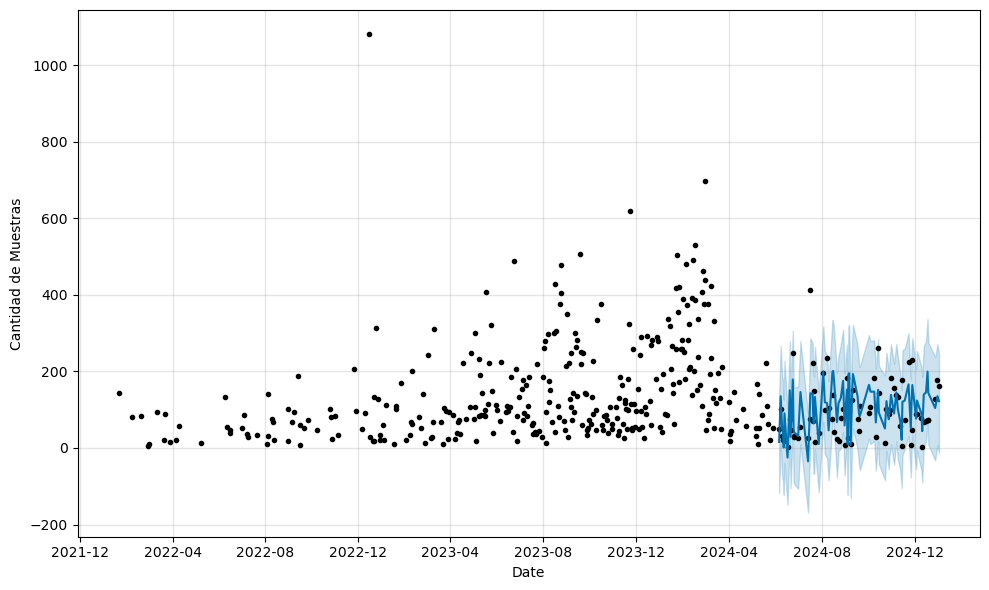

In [54]:
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Cantidad de Muestras')
plt.show()

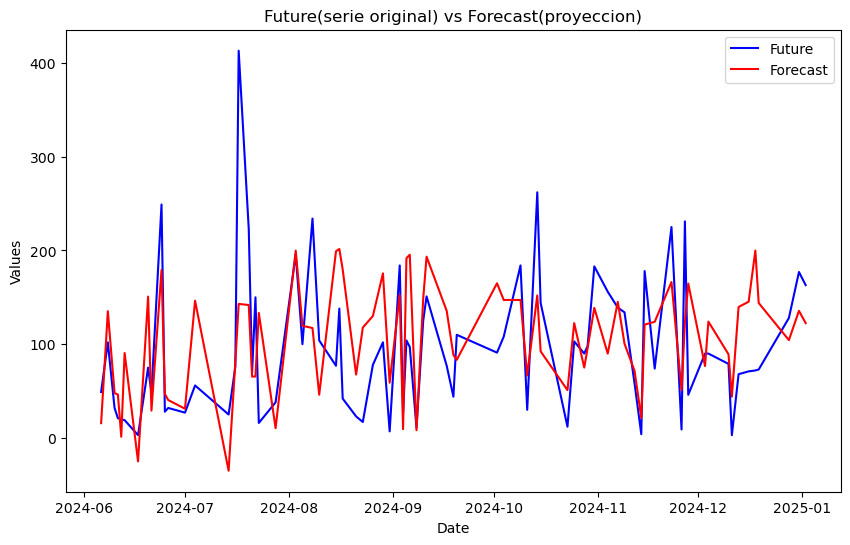

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(future['ds'], future['y'], label='Future', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Future(serie original) vs Forecast(proyeccion)')
plt.legend()
# gráfico
plt.show()

### Modelo Neural Prophet (solo : 'ds','y')

#### DispatchSend

In [ ]:
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed
import pandas as pd
import matplotlib.pyplot as plt

set_random_seed(0)

df = pd.read_csv('Geochemical_Checklist.csv', sep=',') # leemos el archivo csv
pd.set_option('display.max_columns', None) # lo que realizamos aquí es que se muestren todas las columnas
#print(df.head(5)) # mostramos las primeras 5 filas
df['DispatchDate'] = pd.to_datetime(df['DispatchDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ResultDate'] = pd.to_datetime(df['ResultDate'])

# Seleccionamos las columnas relevantes
df_dispatchdate = df[[ 'TotalSample_SE','DispatchDate']]
# Renombramos las columnas
df_dispatchdate = df_dispatchdate.rename(columns = {'DispatchDate':'ds', 'TotalSample_SE':'y'})
# Agregamos la suma de 'y' por 'ds'
df_dispatchdate = df_dispatchdate.groupby('ds')['y'].sum().reset_index()
demand_df = df_dispatchdate.copy()
print(demand_df.shape)


(192, 2)


In [57]:
# Supongamos que 'df' es tu DataFrame, ordenado por fecha.
# Alternativa 1 (80/10/10)
train_size = int(len(demand_df) * 0.8)
valid_size = (len(demand_df) - train_size) // 2
df_train = demand_df[:train_size]
df_valid = demand_df[train_size: train_size + valid_size]
df_test = demand_df[train_size + valid_size:]

print(f"Alternativa 1: Train={len(df_train)}, Valid={len(df_valid)}, Test={len(df_test)}")


# Alternativa 2 (75/12.5/12.5)
train_size = int(len(demand_df) * 0.75)
valid_size = int(len(demand_df) * 0.125) # Calculo explicito
# valid_size = (len(df) - train_size) // 2  #Tambien se podria usar division entera.

df_train = demand_df[:train_size]
df_valid = demand_df[train_size: train_size + valid_size]
df_test = demand_df[train_size + valid_size:]


print(f"Alternativa 2: Train={len(df_train)}, Valid={len(df_valid)}, Test={len(df_test)}")

#Verificacion de indices
if isinstance(demand_df.index, pd.RangeIndex):
    assert df_train.index.max() < df_valid.index.min()
    assert df_valid.index.max() < df_test.index.min()
elif isinstance(demand_df.index, pd.DatetimeIndex):
    assert df_train['ds'].max() < df_valid['ds'].min()
    assert df_valid['ds'].max() < df_test['ds'].min()

Alternativa 1: Train=153, Valid=19, Test=20
Alternativa 2: Train=144, Valid=24, Test=24


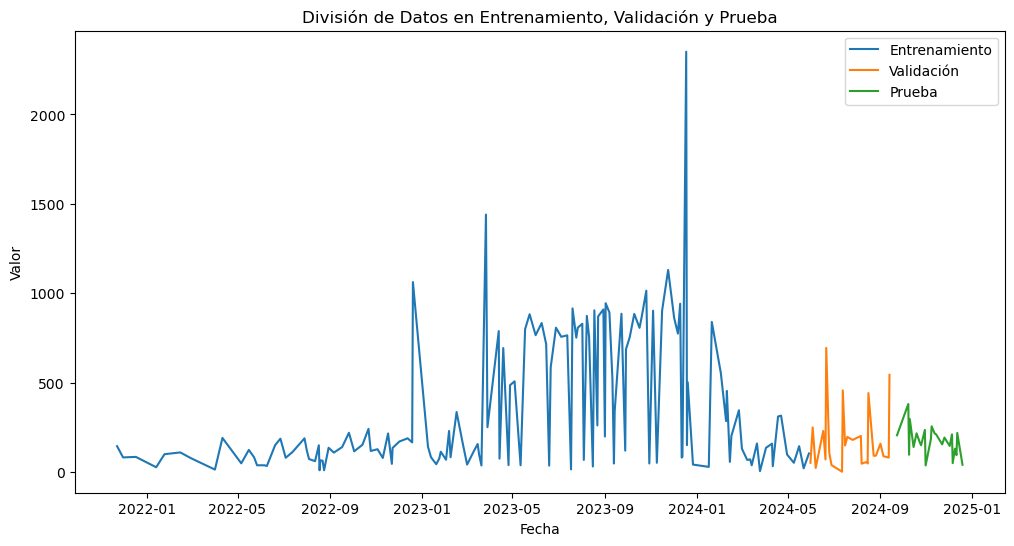

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\marco\anaconda3\envs\ldi2_cuda\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 15.278% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Di

Epoch 220: 100%|██████████| 220/220 [00:00<00:00, 5608.79it/s, loss=0.085, v_num=7, MAE_val=187.0, RMSE_val=261.0, Loss_val=0.105, RegLoss_val=0.000, MAE=170.0, RMSE=274.0, Loss=0.0886, RegLoss=0.000]    


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
219,186.743668,260.907959,0.104902,0.0,219,169.517273,273.533081,0.088555,0.0


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['ds'], df_train['y'], label='Entrenamiento')
plt.plot(df_valid['ds'], df_valid['y'], label='Validación')
plt.plot(df_test['ds'], df_test['y'], label='Prueba')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('División de Datos en Entrenamiento, Validación y Prueba')
plt.show()

from pytorch_lightning import Trainer
m = NeuralProphet()

#m.add_country_holidays(country_name='Australia')
metrics = m.fit(df=df_train, validation_df=df_valid, freq="W", progress="plot-all")
metrics[-1:]

#almacenamos las metricas de neuralprophet en un dataframe con nombre Modelo3
# Modelo3 = pd.DataFrame(metrics)
# print(Modelo3)

#### Receivedate   

In [59]:
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed
import pandas as pd
import matplotlib.pyplot as plt

set_random_seed(0)

df = pd.read_csv('Geochemical_Checklist.csv', sep=',') # leemos el archivo csv
pd.set_option('display.max_columns', None) # lo que realizamos aquí es que se muestren todas las columnas
#print(df.head(5)) # mostramos las primeras 5 filas
df['DispatchDate'] = pd.to_datetime(df['DispatchDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ResultDate'] = pd.to_datetime(df['ResultDate'])

# Seleccionamos las columnas relevantes
df_receiveddate = df[[ 'TotalSample_SE','ReceivedDate']]
# Renombramos las columnas
df_receiveddate = df_receiveddate.rename(columns = {'ReceivedDate':'ds', 'TotalSample_SE':'y'})
# Agregamos la suma de 'y' por 'ds'
df_receiveddate = df_receiveddate.groupby('ds')['y'].sum().reset_index()
demand_df = df_receiveddate.copy()
print(demand_df.shape)

(188, 2)


In [60]:
# Supongamos que 'df' es tu DataFrame, ordenado por fecha.
# Alternativa 1 (80/10/10)
train_size = int(len(demand_df) * 0.8)
valid_size = (len(demand_df) - train_size) // 2
df_train = demand_df[:train_size]
df_valid = demand_df[train_size: train_size + valid_size]
df_test = demand_df[train_size + valid_size:]

print(f"Alternativa 1: Train={len(df_train)}, Valid={len(df_valid)}, Test={len(df_test)}")


# Alternativa 2 (75/12.5/12.5)
train_size = int(len(demand_df) * 0.75)
valid_size = int(len(demand_df) * 0.125) # Calculo explicito
# valid_size = (len(df) - train_size) // 2  #Tambien se podria usar division entera.

df_train = demand_df[:train_size]
df_valid = demand_df[train_size: train_size + valid_size]
df_test = demand_df[train_size + valid_size:]


print(f"Alternativa 2: Train={len(df_train)}, Valid={len(df_valid)}, Test={len(df_test)}")

#Verificacion de indices
if isinstance(demand_df.index, pd.RangeIndex):
    assert df_train.index.max() < df_valid.index.min()
    assert df_valid.index.max() < df_test.index.min()
elif isinstance(demand_df.index, pd.DatetimeIndex):
    assert df_train['ds'].max() < df_valid['ds'].min()
    assert df_valid['ds'].max() < df_test['ds'].min()

Alternativa 1: Train=150, Valid=19, Test=19
Alternativa 2: Train=141, Valid=23, Test=24


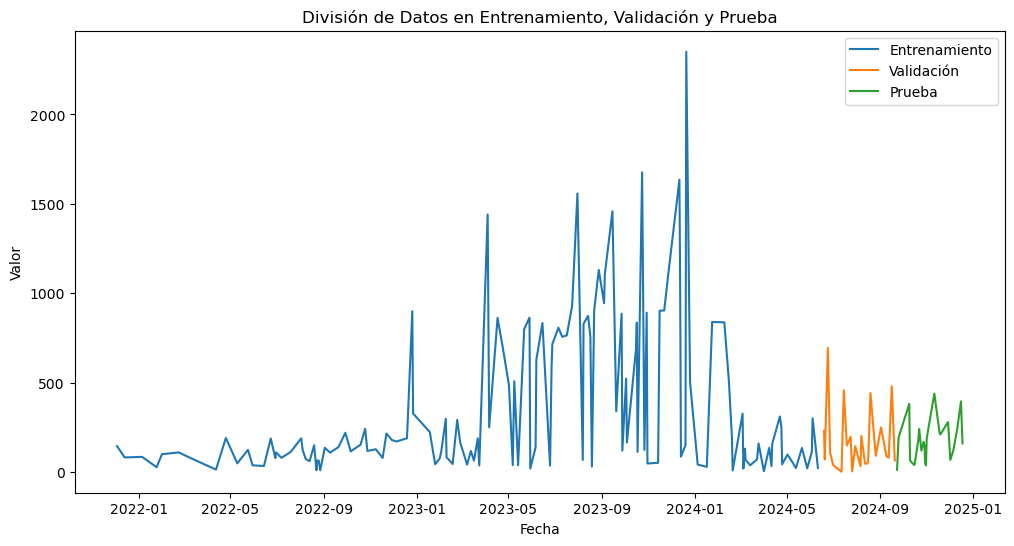

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\marco\anaconda3\envs\ldi2_cuda\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 16.312% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabl

Epoch 220: 100%|██████████| 220/220 [00:00<00:00, 5907.24it/s, loss=0.0823, v_num=8, MAE_val=156.0, RMSE_val=210.0, Loss_val=0.0557, RegLoss_val=0.000, MAE=200.0, RMSE=296.0, Loss=0.0798, RegLoss=0.000]  


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
219,156.374863,210.433807,0.055724,0.0,219,200.468475,295.996002,0.079841,0.0


In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['ds'], df_train['y'], label='Entrenamiento')
plt.plot(df_valid['ds'], df_valid['y'], label='Validación')
plt.plot(df_test['ds'], df_test['y'], label='Prueba')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('División de Datos en Entrenamiento, Validación y Prueba')
plt.show()

from pytorch_lightning import Trainer
m = NeuralProphet()

#m.add_country_holidays(country_name='Australia')
metrics = m.fit(df=df_train, validation_df=df_valid, freq="W", progress="plot-all")
metrics[-1:]

#almacenamos las metricas de neuralprophet en un dataframe con nombre Modelo3
# Modelo3 = pd.DataFrame(metrics)
# print(Modelo3)

#### ResultDate

In [62]:
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed
import pandas as pd
import matplotlib.pyplot as plt

set_random_seed(0)

df = pd.read_csv('Geochemical_Checklist.csv', sep=',') # leemos el archivo csv
pd.set_option('display.max_columns', None) # lo que realizamos aquí es que se muestren todas las columnas
#print(df.head(5)) # mostramos las primeras 5 filas
df['DispatchDate'] = pd.to_datetime(df['DispatchDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ResultDate'] = pd.to_datetime(df['ResultDate'])

# Seleccionamos las columnas relevantes
df_resultdate = df[[ 'TotalSample_SE','ResultDate']]
# Renombramos las columnas
df_resultdate = df_resultdate.rename(columns = {'ResultDate':'ds', 'TotalSample_SE':'y'})
# Agregamos la suma de 'y' por 'ds'
df_resultdate = df_resultdate.groupby('ds')['y'].sum().reset_index()
demand_df = df_resultdate.copy()
print(demand_df.shape)

(405, 2)


In [63]:
# Supongamos que 'df' es tu DataFrame, ordenado por fecha.
# Alternativa 1 (80/10/10)
train_size = int(len(demand_df) * 0.8)
valid_size = (len(demand_df) - train_size) // 2
df_train = demand_df[:train_size]
df_valid = demand_df[train_size: train_size + valid_size]
df_test = demand_df[train_size + valid_size:]

print(f"Alternativa 1: Train={len(df_train)}, Valid={len(df_valid)}, Test={len(df_test)}")


# Alternativa 2 (75/12.5/12.5)
train_size = int(len(demand_df) * 0.75)
valid_size = int(len(demand_df) * 0.125) # Calculo explicito
# valid_size = (len(df) - train_size) // 2  #Tambien se podria usar division entera.

df_train = demand_df[:train_size]
df_valid = demand_df[train_size: train_size + valid_size]
df_test = demand_df[train_size + valid_size:]


print(f"Alternativa 2: Train={len(df_train)}, Valid={len(df_valid)}, Test={len(df_test)}")

#Verificacion de indices
if isinstance(demand_df.index, pd.RangeIndex):
    assert df_train.index.max() < df_valid.index.min()
    assert df_valid.index.max() < df_test.index.min()
elif isinstance(demand_df.index, pd.DatetimeIndex):
    assert df_train['ds'].max() < df_valid['ds'].min()
    assert df_valid['ds'].max() < df_test['ds'].min()

Alternativa 1: Train=324, Valid=40, Test=41
Alternativa 2: Train=303, Valid=50, Test=52


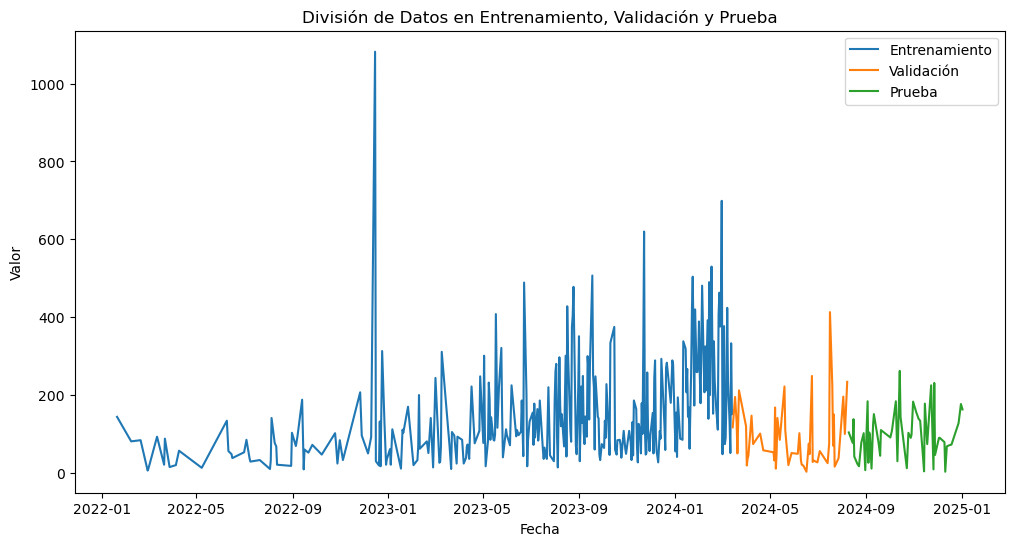

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\marco\anaconda3\envs\ldi2_cuda\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 58.086% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabl

Epoch 170: 100%|██████████| 170/170 [00:00<00:00, 2582.97it/s, loss=0.0837, v_num=9, MAE_val=182.0, RMSE_val=197.0, Loss_val=0.301, RegLoss_val=0.000, MAE=80.30, RMSE=110.0, Loss=0.0835, RegLoss=0.000] 


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
169,182.324432,196.936386,0.300604,0.0,169,80.303818,110.233734,0.083523,0.0


In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['ds'], df_train['y'], label='Entrenamiento')
plt.plot(df_valid['ds'], df_valid['y'], label='Validación')
plt.plot(df_test['ds'], df_test['y'], label='Prueba')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('División de Datos en Entrenamiento, Validación y Prueba')
plt.show()

from pytorch_lightning import Trainer
m = NeuralProphet()

#m.add_country_holidays(country_name='Australia')
metrics = m.fit(df=df_train, validation_df=df_valid, freq="W", progress="plot-all")
metrics[-1:]

#almacenamos las metricas de neuralprophet en un dataframe con nombre Modelo3
# Modelo3 = pd.DataFrame(metrics)
# print(Modelo3)

### Comparacion de modelos

In [42]:
#realizamos una tabla con las metricas de cada modelo realizado anteriormente   Modelo1, Modelo2, Modelo3
#Tabla con las métricas
mae_Modelo3 = 169.850677

print('prophet sin regresores:',mae_Modelo1)
print('prophet con regresores:',mae_Modelo2)
print('Neuralprophet :',mae_Modelo3)


prophet sin regresores: 79.51642863146681
prophet con regresores: 102.57324863006232
Neuralprophet : 169.850677


In [43]:
print(m.config)


# Aca se usa para mostrar la configuración actual del modelo.

{'growth': 'linear', 'changepoints': None, 'n_changepoints': 10, 'changepoints_range': 0.8, 'trend_reg': 0, 'trend_reg_threshold': False, 'trend_global_local': 'global', 'trend_local_reg': False, 'yearly_seasonality': 'auto', 'yearly_seasonality_glocal_mode': 'auto', 'weekly_seasonality': 'auto', 'weekly_seasonality_glocal_mode': 'auto', 'daily_seasonality': 'auto', 'daily_seasonality_glocal_mode': 'auto', 'seasonality_mode': 'additive', 'seasonality_reg': 0, 'season_global_local': 'global', 'seasonality_local_reg': False, 'future_regressors_model': 'linear', 'future_regressors_d_hidden': 4, 'future_regressors_num_hidden_layers': 2, 'n_forecasts': 1, 'n_lags': 0, 'ar_layers': [], 'ar_reg': None, 'lagged_reg_layers': [], 'learning_rate': None, 'epochs': None, 'batch_size': None, 'loss_func': 'SmoothL1Loss', 'optimizer': 'AdamW', 'newer_samples_weight': 2, 'newer_samples_start': 0.0, 'quantiles': [], 'impute_missing': True, 'impute_linear': 10, 'impute_rolling': 10, 'drop_missing': False

In [44]:
# n_epochs_used = len(metrics)
# print(f"Número de épocas utilizadas: {n_epochs_used}") # Durante cada epochs, el modelo pasa por todo el conjunto de datos de entrenamiento y ajusta los pesos del modelo para minimizar el error de predicción

In [45]:
# m = NeuralProphet(epochs=30)
# m.add_country_holidays(country_name='Australia')
# metrics2 = m.fit(df=df_train, validation_df=df_valid, freq="D")
# metrics2[-1:]